<a href="https://colab.research.google.com/github/deutschkihun/KaggleStudy/blob/master/First_NLP_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **First NLP Analysis**


## **Introduction**
This is my first Natural Language Processing Analysis.I'm very proud to introduce my kernel 

## Source file folder 

https://drive.google.com/drive/folders/1PX-yaWpDvr9Dto5FCR1xdJLHNZIW2hsv?usp=sharing

#1. Preliminary step

### 1.1 Jaccard score

Jaccard score is the evaulation metrics that the competition guideline suggested. I got a lot of support from [Parul's kernal](https://www.kaggle.com/parulpandey/eda-and-preprocessing-for-bert) to understand and implementation how to use this score system 

In [0]:
# Numeric 
from math import*
 
def jaccard_numeric_values(x,y):
 
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)
 
jaccard_numeric_values([0,1,2,5,6],[0,2,3,5,7,9])

0.375

In [0]:
def jaccard_string(str1,str2):
    
    x = set(str1.lower().split())
    y = set(str2.lower().split())
    # convert String with lowercase and then split it
    
    z = x.intersection(y)
    t = x.union(y)
    # Alternative  : instead of t = x.union(y) you can write (len(x) + len(y) - len(z))
    return float(len(z)) / float(len(t))


Sentence_1 = 'I am a data scientist at Google'
Sentence_2 = 'I am a software engineer at Google'
Sentence_3 = 'I am a software engineer at Microsoft'

    
print(jaccard_string(Sentence_1,Sentence_2))
print(jaccard_string(Sentence_1,Sentence_3))
print(jaccard_string(Sentence_2,Sentence_3))

0.5555555555555556
0.4
0.75


## 1.2 Importing prerequisite libraries

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import os
import numpy as np
import pandas as pd


# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from IPython.display import Image

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

### 1.3 Reading datasets

In [0]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle/Tweet sentiment extraction/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle/Tweet sentiment extraction/test.csv')

In [0]:
# First 5 rows of trains data
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [0]:
# shape of train data
rows = train.shape[0]
columns = train.shape[1]
print('The number of rows in train data are {0} and columns are {1}'.format(rows,columns))

The number of rows in train data are 27481 and columns are 4


In [0]:
# First 5 rows of test data
test.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [0]:
# shape of train data
rows = test.shape[0]
columns = test.shape[1]
print('The number of rows in train data are {0} and columns are {1}'.format(rows,columns))

The number of rows in train data are 3534 and columns are 3


# 2. Exploratory Data Analysis (EDA)

### 2.1 Missing Value & Duplication

In [0]:
train.isnull().sum()
# checking null value in train data

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [0]:
test.isnull().sum()
# checking null value in test data

textID       0
text         0
sentiment    0
dtype: int64

Observation 

> We have one null value in train data. We need to drop out it

In [0]:
train.dropna(axis = 0, how ='any',inplace=True) 

In [0]:
print('The number of duplicated train data is:',sum(train.duplicated()))
print('The number of duplicated test data is:',sum(test.duplicated()))

The number of duplicated train data is: 0
The number of duplicated test data is: 0


<a name="sec2.2"></a>
### 2.2 Incorrect datatype

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


<a name="sec2.3"></a>
### 2.3 Sampling of sentiment

In [0]:
print('sample of positive sentiment: ',train[train['sentiment']=='positive']['selected_text'].sample())
print('sample of negative sentiment: ',train[train['sentiment']=='negative']['selected_text'].sample())
print('sample of neutral sentiment: ',train[train['sentiment']=='neutral']['selected_text'].sample())

### 2.4 Data Visualization 


<a name="sec2.4.1"></a>
### Sentiment proportion

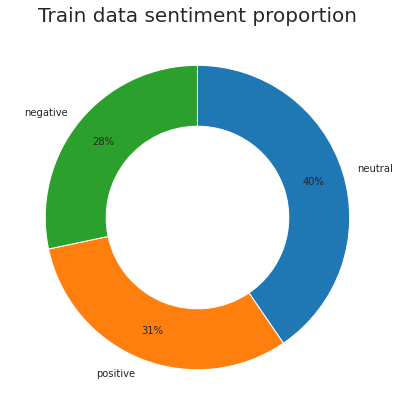

In [0]:
# Pie charts 
plt.figure(figsize=(17,7)) 
sorted_counts = train['sentiment'].value_counts()
ax=plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False,pctdistance=0.8 ,wedgeprops = {'width' : 0.4}, autopct='%1.0f%%');

plt.title('Train data sentiment proportion',fontsize=20);

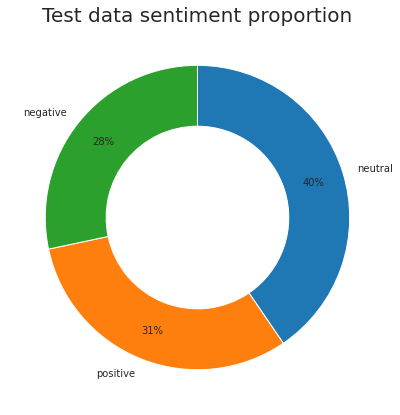

In [0]:
# Pie charts 
plt.figure(figsize=(17,7)) 
sorted_counts = test['sentiment'].value_counts()
ax=plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False,pctdistance=0.8 ,wedgeprops = {'width' : 0.4}, autopct='%1.0f%%');

plt.title('Test data sentiment proportion',fontsize=20);

### Add new feature 

As we know our goal is that we predict selected_text in submission file. So it's more meaningful that we add new feature on the dataframe.


### First : Jaccard score

In [0]:
def jaccard_string(str1,str2):
    
    x = set(str1.lower().split())
    y = set(str2.lower().split())
    
    z = x.intersection(y)
    t = x.union(y)
    return float(len(z)) / float(len(t))

# Just remember the beginning of this kernel. I introduced the jaccard score with python code. Copy it !!

In [0]:
jaccard_score = []

for rows in train.itertuples():
    # another option : for index,rows in iterrows(), but in this case itertuples is faster than iterrows
    # Iterate over DataFrame rows as namedtuples.
    sentence1 = rows.text
    # first we saved text column as sentence 1 
    sentence2 = rows.selected_text
    # second we saved selected_text column as sentence 2

    
    jaccard_result = jaccard_string(sentence1,sentence2)
    # Now we apply jaccard score algoritum in sentnce 1,2

    jaccard_score.append([sentence1,sentence2,jaccard_result])
    # append sentence

In [0]:
jaccard = pd.DataFrame(jaccard_score,columns=['text','selected_text','jaccard score'])
# save in dataframe

In [0]:
jaccard.head()

,text,selected_text,jaccard score
0,"I`d have responded, if I were going","I`d have responded, if I were going",1.000000
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0.200000
2,my boss is bullying me...,bullying me,0.166667
3,what interview! leave me alone,leave me alone,0.600000
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",0.214286


In [0]:
train=train.merge(jaccard,how='outer')
train.head()

# jaccard dataframe is merged with train data

,textID,text,selected_text,sentiment,jaccard score
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1.000000
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0.200000
2,088c60f138,my boss is bullying me...,bullying me,negative,0.166667
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0.600000
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0.214286


### Second : number of word and difference

In [0]:
train['number of word in T'] = train['text'].apply(lambda x : len(str(x).split() ))   # number of word in Text
train['number of word in ST'] = train['selected_text'].apply(lambda x : len(str(x).split() )) # number of word in Selected_text

train['difference'] = train['number of word in T'] - train['number of word in ST']

In [0]:
train.head()

,textID,text,selected_text,sentiment,jaccard score,number of word in T,number of word in ST,difference
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1.000000,7,7,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0.200000,10,2,8
2,088c60f138,my boss is bullying me...,bullying me,negative,0.166667,5,2,3
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0.600000,5,3,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0.214286,14,3,11


<a name="sec2.4.3"></a>
### Text data analysis

In [0]:
positive = train[train['sentiment']=='positive']
negative = train[train['sentiment']=='negative']
neutral = train[train['sentiment']=='neutral']

**First : Text**

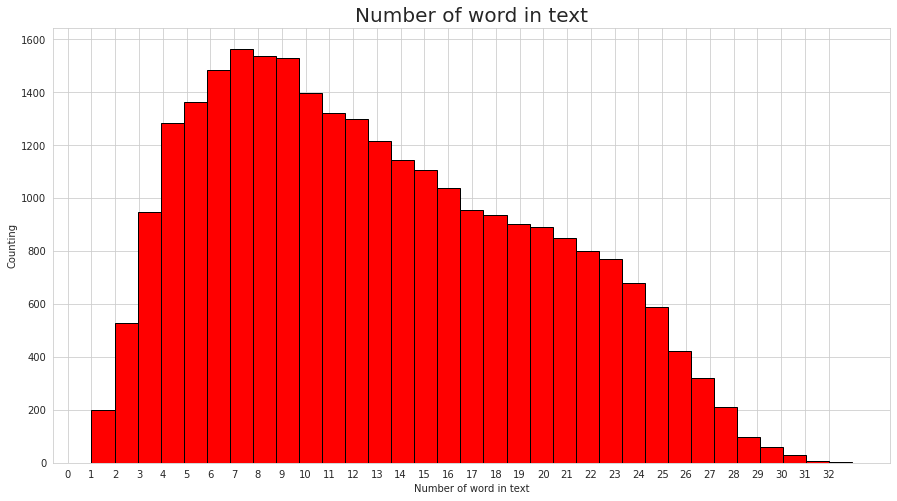

In [0]:
plt.subplots(figsize=(15,8))
plt.hist(x='number of word in T',bins=33,data=train,edgecolor='black',color='red')
plt.title('Number of word in text',fontsize=20)
plt.xlabel('Number of word in text')
plt.ylabel('Counting')
x1 = list(range(0,33,1))
plt.xticks(x1);

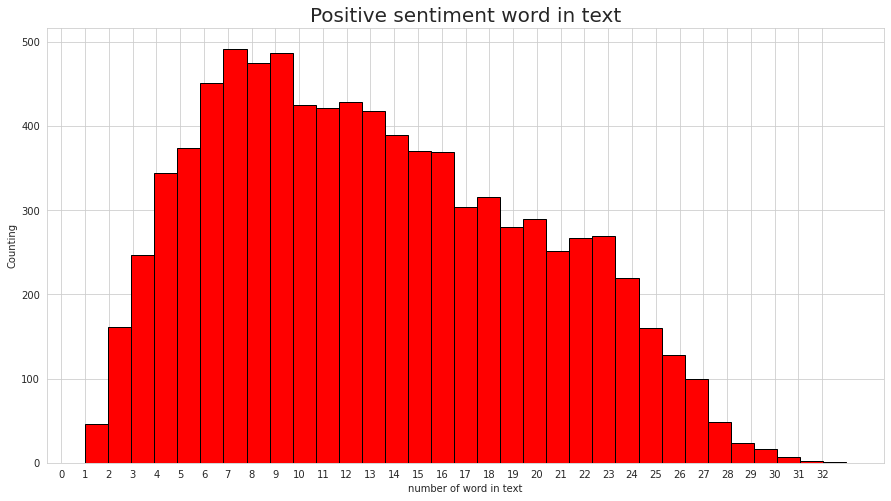

In [0]:
plt.subplots(figsize=(15,8))
plt.hist(x='number of word in T',bins=33,data=positive,edgecolor='black',color='red')
plt.title('Positive sentiment word in text',fontsize=20)
plt.xlabel('number of word in text')
plt.ylabel('Counting')
x1 = list(range(0,33,1))
plt.xticks(x1);

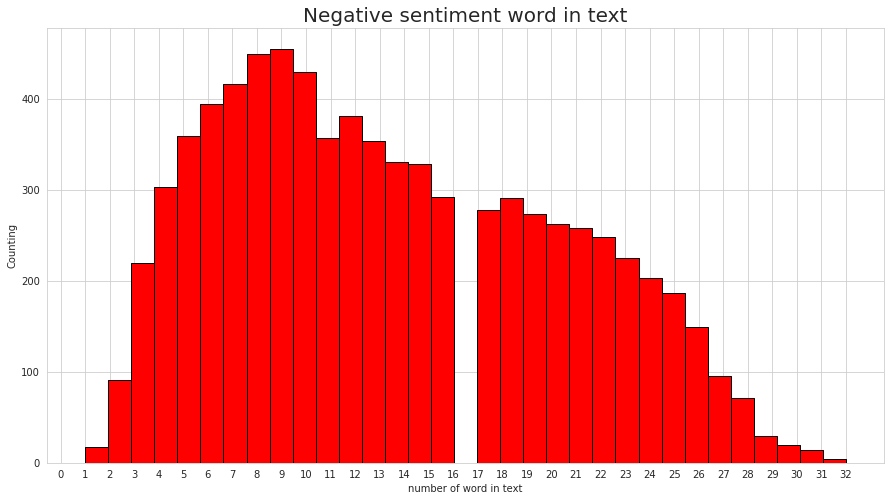

In [0]:
plt.subplots(figsize=(15,8))
plt.hist(x='number of word in T',bins=33,data=negative,edgecolor='black',color='red')
plt.title('Negative sentiment word in text',fontsize=20)
plt.xlabel('number of word in text')
plt.ylabel('Counting')
x1 = list(range(0,33,1))
plt.xticks(x1);

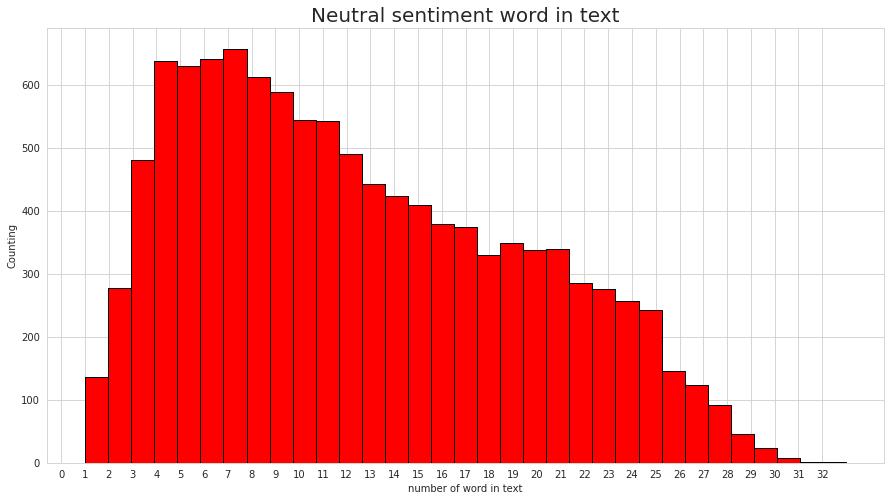

In [0]:
plt.subplots(figsize=(15,8))
plt.hist(x='number of word in T',bins=33,data=neutral,edgecolor='black',color='red')
plt.title('Neutral sentiment word in text',fontsize=20)
plt.xlabel('number of word in text')
plt.ylabel('Counting')
x1 = list(range(0,33,1))
plt.xticks(x1);

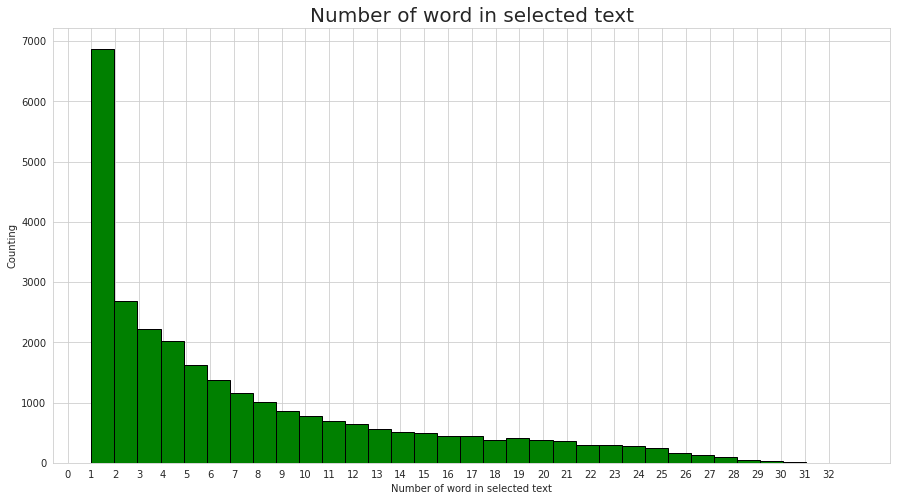

In [0]:
plt.subplots(figsize=(15,8))
plt.hist(x='number of word in ST',bins=33,data=train,edgecolor='black',color='green')
plt.title('Number of word in selected text',fontsize=20)
plt.xlabel('Number of word in selected text')
plt.ylabel('Counting')
x1 = list(range(0,33,1))
plt.xticks(x1);

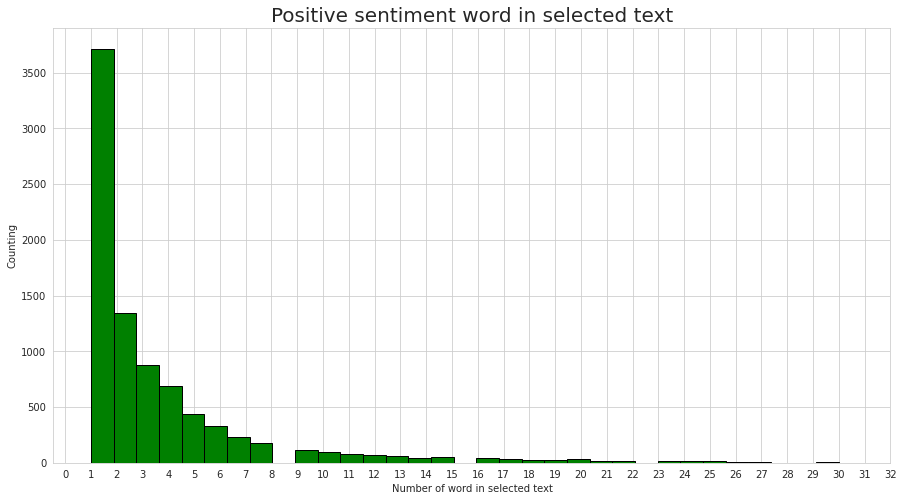

In [0]:
plt.subplots(figsize=(15,8))
plt.hist(x='number of word in ST',bins=33,data=positive,edgecolor='black',color='green')
plt.title('Positive sentiment word in selected text',fontsize=20)
plt.xlabel('Number of word in selected text')
plt.ylabel('Counting')
x1 = list(range(0,33,1))
plt.xticks(x1);

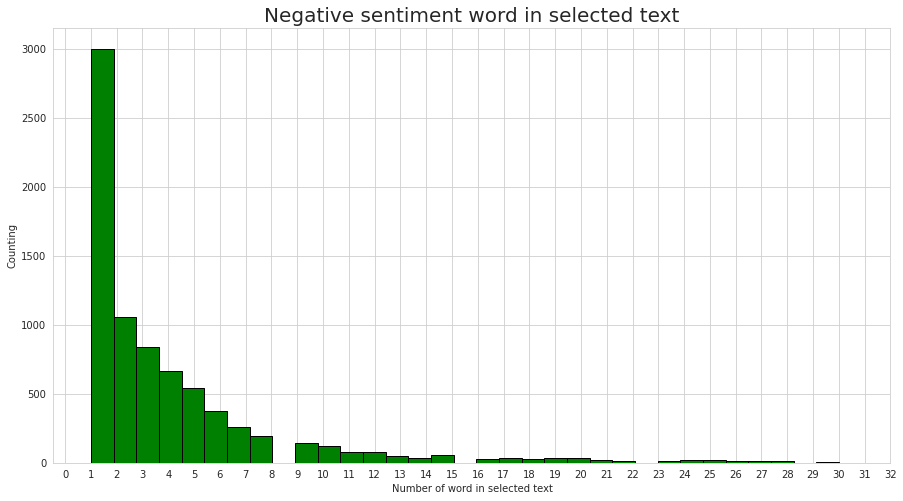

In [0]:
plt.subplots(figsize=(15,8))
plt.hist(x='number of word in ST',bins=33,data=negative,edgecolor='black',color='green')
plt.title('Negative sentiment word in selected text',fontsize=20)
plt.xlabel('Number of word in selected text')
plt.ylabel('Counting')
x1 = list(range(0,33,1))
plt.xticks(x1);

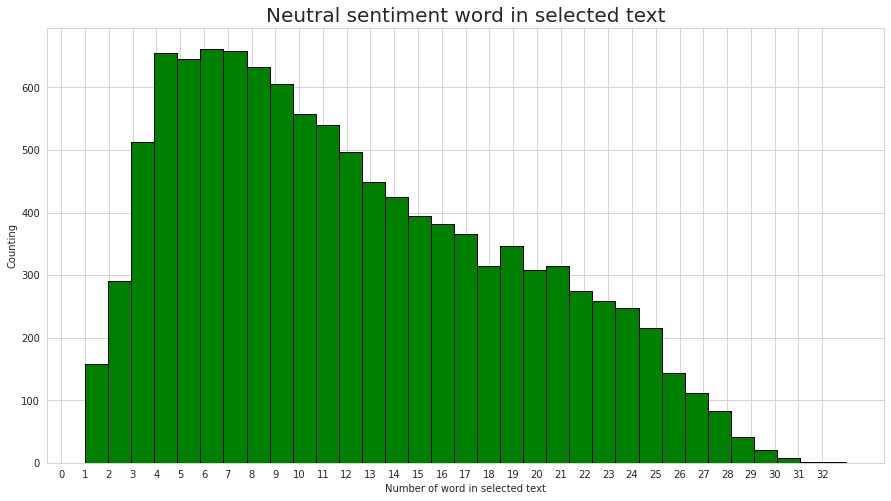

In [0]:
plt.subplots(figsize=(15,8))
plt.hist(x='number of word in ST',bins=33,data=neutral,edgecolor='black',color='green')
plt.title('Neutral sentiment word in selected text',fontsize=20)
plt.xlabel('Number of word in selected text')
plt.ylabel('Counting')
x1 = list(range(0,33,1))
plt.xticks(x1);

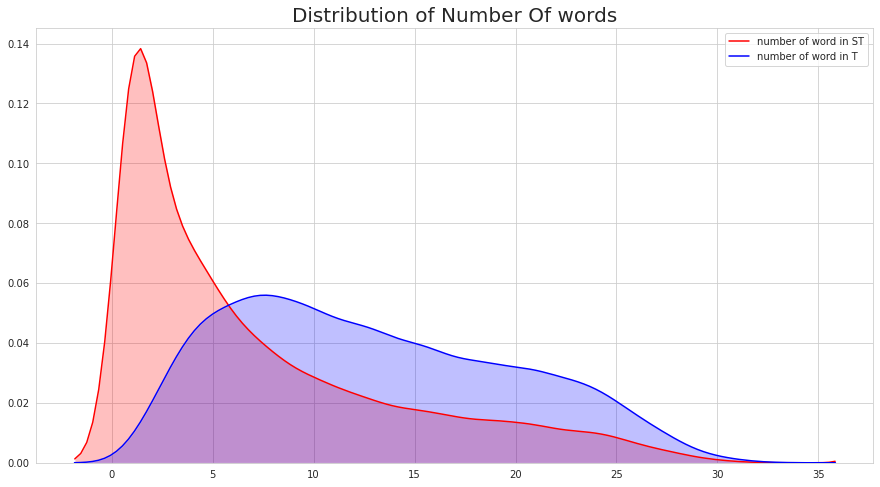

In [0]:
plt.figure(figsize=(15,8))
p1=sns.kdeplot(train['number of word in ST'], shade=True, color="r")
p1.set_title('Distribution of Number Of words',fontsize=20)
p1=sns.kdeplot(train['number of word in T'], shade=True, color="b");

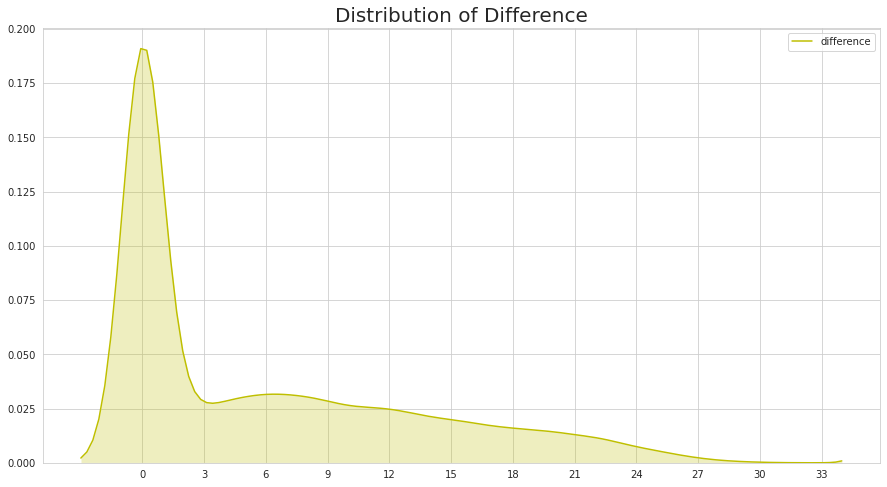

In [0]:
plt.figure(figsize=(15,8))
p1=sns.kdeplot(train['difference'], shade=True, color="y")
p1.set_title('Distribution of Difference',fontsize=20)
x1 = list(range(0,35,3))
plt.xticks(x1);

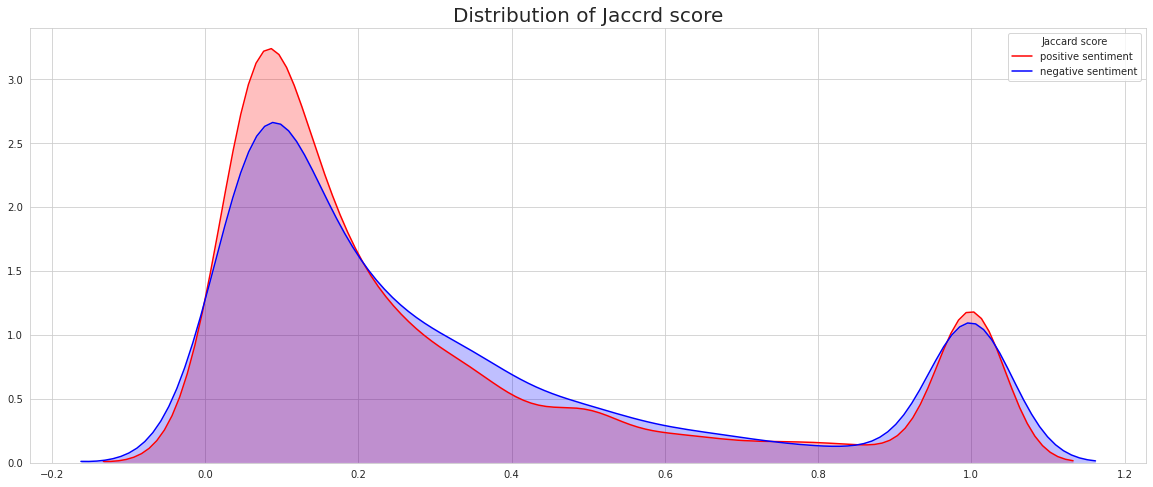

In [0]:
plt.figure(figsize=(20,8))
p1=sns.kdeplot(train[train['sentiment']=='positive']['jaccard score'], shade=True, color="r").set_title('Distribution of Jaccrd score',fontsize=20)
p1=sns.kdeplot(train[train['sentiment']=='negative']['jaccard score'], shade=True, color="b")
plt.legend(['positive sentiment','negative sentiment'],title='Jaccard score');

<Figure size 1080x1080 with 0 Axes>

Text(0.5, 0.98, 'number of word in Text and selected Text')

<Figure size 1080x1080 with 0 Axes>

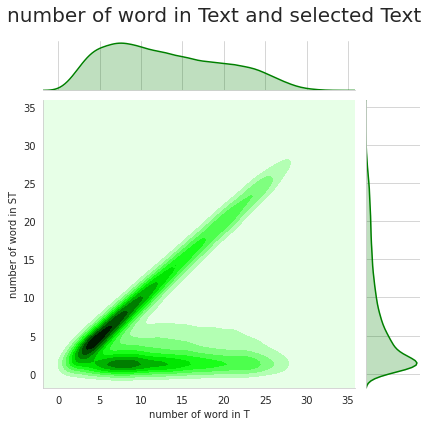

In [0]:
plt.figure(figsize=(15,15))
g=sns.jointplot("number of word in T", "number of word in ST", data=train,kind="kde", space=0, color="g");
g.fig.suptitle("number of word in Text and selected Text",fontsize=20)

# Format nicely.
g.fig.tight_layout()

#Reduce plot to make room for suptitle
g.fig.subplots_adjust(top=0.9)
plt.show()


# 3. Text data preprocessing

### 3.1 Stemming

stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form

Like here

- sleeping -> sleep
- sleepy -> sleep

In [0]:
from nltk.stem import SnowballStemmer

def stemming(words):
    s = SnowballStemmer('english')
    s.stem(words)
    return words 

In [0]:
train['text'] = train['text'].apply(lambda x: stemming(x))
test['text'] = test['text'].apply(lambda x:stemming(x))
train['selected_text'] = train['selected_text'].apply(lambda x: stemming(x))

### 3.2 Contraction mapping

Contraction are shortened version of words or syllables. By nature, contraction pose a problem for NLP and text analysis because we have a special apostrophe character in the word. Hence, there should be some definitve process by which we can deal with contractions when processing text. 

In [0]:
"""
Expanding contraction 
"""
dic = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                   "can't've": "cannot have", "'cause": "because", "could've": "could have", 
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
                   "he'll've": "he he will have", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                   "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                   "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have" };

In [0]:
def mapping_replacer(x, dic): 
    for word in dic.keys(): 
        if " " + word + " " in x: 
            x = x.replace(" " + word + " ", " " + dic[word] + " ")
    return x

In [0]:
train['text'] = train['text'].apply(lambda x:mapping_replacer(x,dic))
train['selected_text'] = train['selected_text'].apply(lambda x:mapping_replacer(x,dic))
test['text'] = test['text'].apply(lambda x:mapping_replacer(x,dic))

### 3.3 Spelling corrector


In [0]:
misspell_data = pd.read_csv("//content/drive/My Drive/Colab Notebooks/Kaggle/Tweet sentiment extraction/aspell.txt",sep=":",names=["correction","misspell"])
misspell_data.misspell = misspell_data.misspell.str.strip()
misspell_data.misspell = misspell_data.misspell.str.split(" ")
misspell_data = misspell_data.explode("misspell").reset_index(drop=True)
misspell_data.drop_duplicates("misspell",inplace=True)
miss_corr = dict(zip(misspell_data.misspell, misspell_data.correction))

In [0]:
def misspelled_correction(val):
    for x in val.split(): 
        if x in miss_corr.keys(): 
            val = val.replace(x, miss_corr[x]) 
    return val

train["text"] = train["text"].apply(lambda x : misspelled_correction(x))
test["text"] = test["text"].apply(lambda x : misspelled_correction(x))
train["selected_text"] = train['selected_text'].apply(lambda x : misspelled_correction(x))

## 3.4 Cleaning Corpus 

Preprocessig is the process which cleans the data to get all in a consistent format and  accurate prediction score. So this process is directly connected with the model result. We need to clean,tokenize and convert data into the matric form 

* make a lowercase
* remove text in square brackets
* reomve hyperlin,HTML
* remove punctuation
* remove line change
* remove words containig numbers

For that we need special libraries 

## 3.5 Tokenization

Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

In [0]:
import re
import string
import nltk
from nltk.corpus import stopwords

In [0]:
########################### Cleaning Corpus ####################################

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    # make a lowercase 

    # re.sub(pattern,repl,string) 
    # find corresponded pattern from string convert to repl
    
    
    text = re.sub('\[.*?\]', '', text)
    #remove text in square brackets
    
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    # remove Hyperlink,HTML 
    
    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # remove punctuation
    
    text = re.sub('\n', '', text)
    # remove line change

    text = re.sub('\w*\d\w*', '', text)
    # remove words containing numbers.

    return text


########################### Tokenization ####################################


def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    combined_text = ' '.join(tokenized_text)
    return combined_text

In [0]:

# Applying the cleaning function to both test and training datasets
train['text'] = train['text'].apply(str).apply(lambda x: text_preprocessing(x))
test['text'] = test['text'].apply(str).apply(lambda x: text_preprocessing(x))
train['selected_text'] = train['selected_text'].apply(str).apply(lambda x: text_preprocessing(x))


# Let's take a look at the updated text
train.head()

,textID,text,selected_text,sentiment,jaccard score,number of word in T,number of word in ST,difference
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral,1.000000,7,7,0
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,0.200000,10,2,8
2,088c60f138,my boss is bullying me,bullying me,negative,0.166667,5,2,3
3,9642c003ef,what interview leave me alone,leave me alone,negative,0.600000,5,3,2
4,358bd9e861,sons of why couldnt they put them on the relea...,sons of,negative,0.214286,14,3,11


## 3.6 Removing Stopwords
- This part can be belonged to the `Part 4.1`.But personally I want to show it separately because for removing stopwords we need to use special libraires.

- Stopword is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

- The reason for ignoring is that those words are not cruial component of the **sentiment analysis**. In other words stopwords have no meaning ,which is related to sentiment or expression


**Notice** 

In order to remve stopswords we have to split word by word. If you compile function without spliting words. your text table will be splited by alphabet.So don't forget to do it !!! 

In [0]:
# nltk.download('punkt')
#nltk.download('stopwords')
# Please make sure that you downloaded 'punkt from nltk 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# Step 1 split word by word

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

def tokenizer(text):
    word_tokens = word_tokenize(text)
    return word_tokens

'''
Alternative of def tokenizer(text)

# from collections import Counter
# train['word'] = train['selected_text'].apply(lambda x:str(x).split())
'''

train['word from ST'] = train['selected_text'].apply(str).apply(lambda x: tokenizer(x))
train['word from T'] = train['text'].apply(str).apply(lambda x: tokenizer(x))



In [0]:
# Step 2 remove stopwords 

def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
train['word from ST'] = train['word from ST'].apply(lambda x:remove_stopword(x))
train['word from T'] = train['word from T'].apply(lambda x: remove_stopword(x))

# 4. Word data Analysis


## 4.1 Word Frequencey 


In [0]:
from collections import Counter

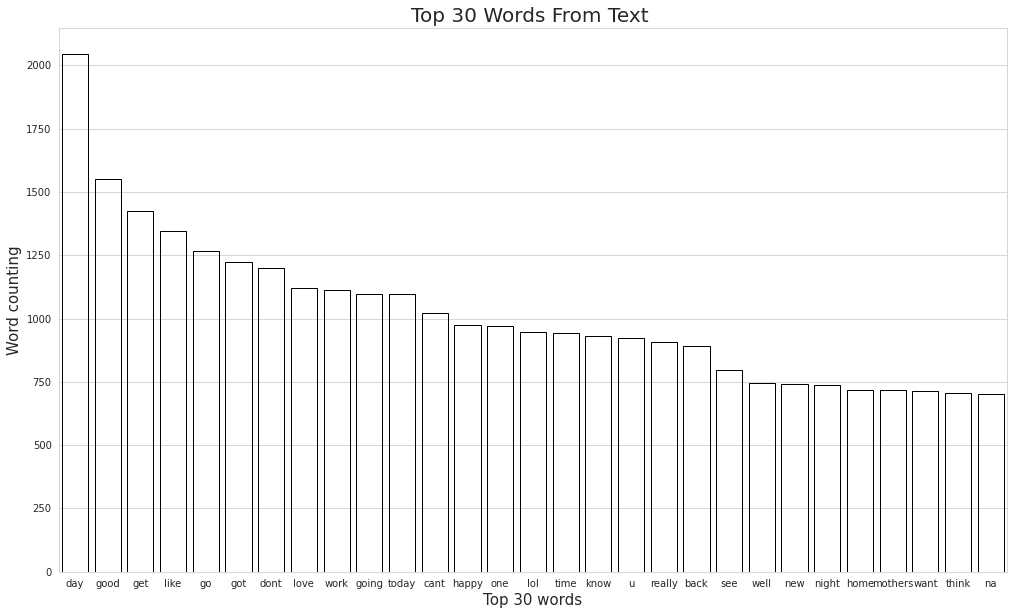

In [0]:
counting = Counter([item for sublist in train['word from T'] for item in sublist])
counting_table = pd.DataFrame(counting.most_common(30))
counting_table.drop([0],inplace=True)
counting_table.columns = ['word','counting']

plt.figure(figsize=(17,10))
ax= sns.barplot(data=counting_table,x='word',y='counting',facecolor=(1, 1, 1, 0),edgecolor='black')
ax.set_title('Top 30 words from text '.title(),fontsize=20)

ax.set_ylabel('Word counting',fontsize=15)
ax.set_xlabel('Top 30 words',fontsize=15);

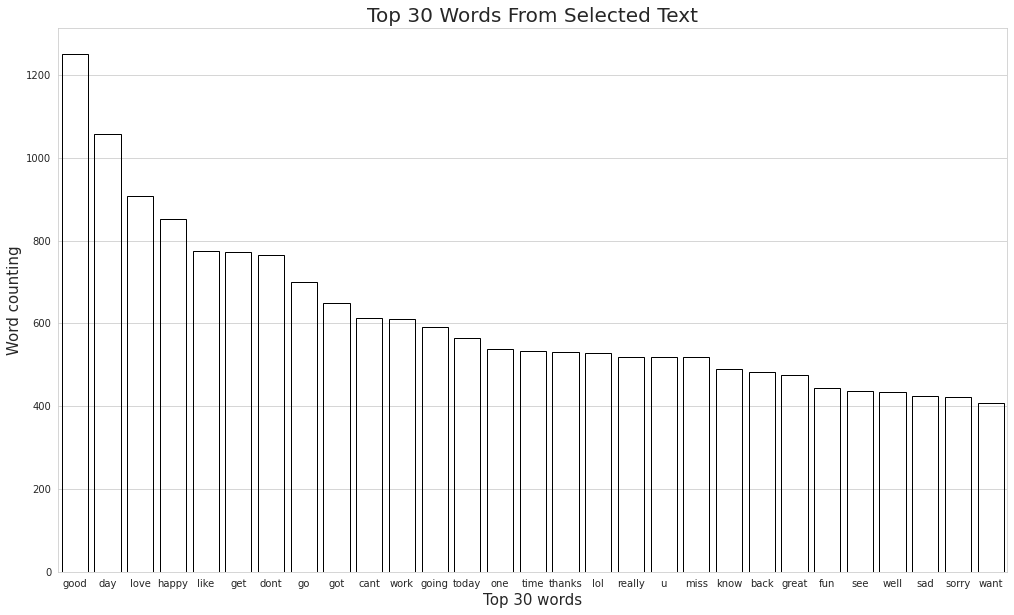

In [0]:
counting = Counter([item for sublist in train['word from ST'] for item in sublist])
counting_table = pd.DataFrame(counting.most_common(30))
counting_table.drop([0],inplace=True)
counting_table.columns = ['word','counting']

plt.figure(figsize=(17,10))
ax= sns.barplot(data=counting_table,x='word',y='counting',facecolor=(1, 1, 1, 0),edgecolor='black')
ax.set_title('Top 30 words from selected text'.title(),fontsize=20)

ax.set_ylabel('Word counting',fontsize=15)
ax.set_xlabel('Top 30 words',fontsize=15);

In [0]:
positive = train[train['sentiment']=='positive']
negative = train[train['sentiment']=='negative']
neutral = train[train['sentiment']=='neutral']

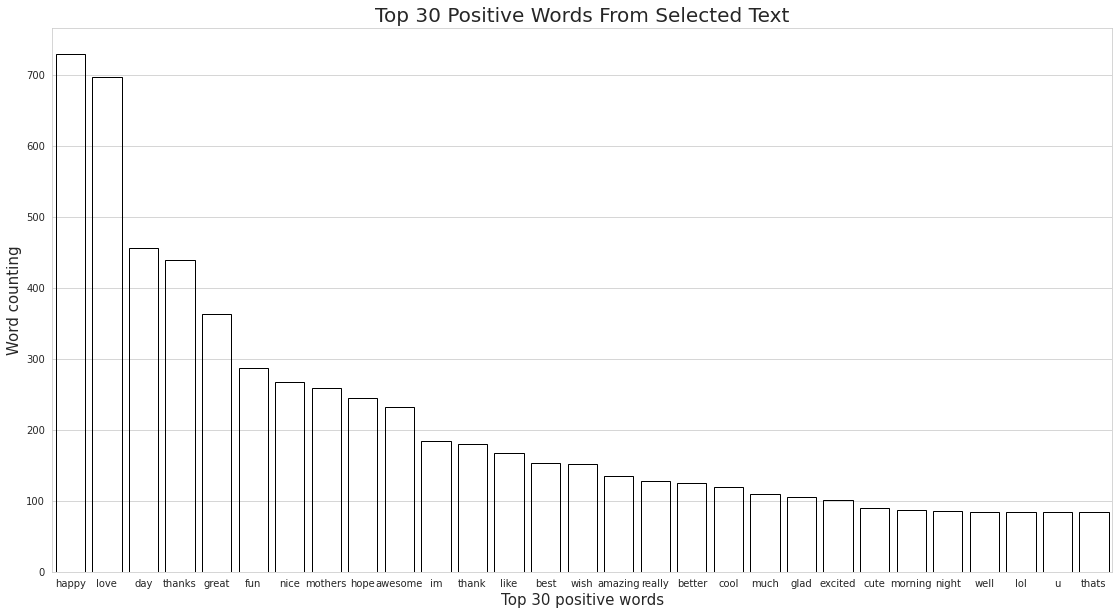

In [0]:
counting_positive_ST = Counter([item for sublist in positive['word from ST'] for item in sublist])
counting_positive_ST = pd.DataFrame(counting_positive_ST.most_common(30))
counting_positive_ST.drop([0],inplace=True)
counting_positive_ST.columns = ['word','counting']

plt.figure(figsize=(19,10))
ax= sns.barplot(data=counting_positive_ST,x='word',y='counting',facecolor=(1, 1, 1, 0),edgecolor='black')
ax.set_title('Top 30 positive words from selected text'.title(),fontsize=20)

ax.set_ylabel('Word counting',fontsize=15)
ax.set_xlabel('Top 30 positive words',fontsize=15);

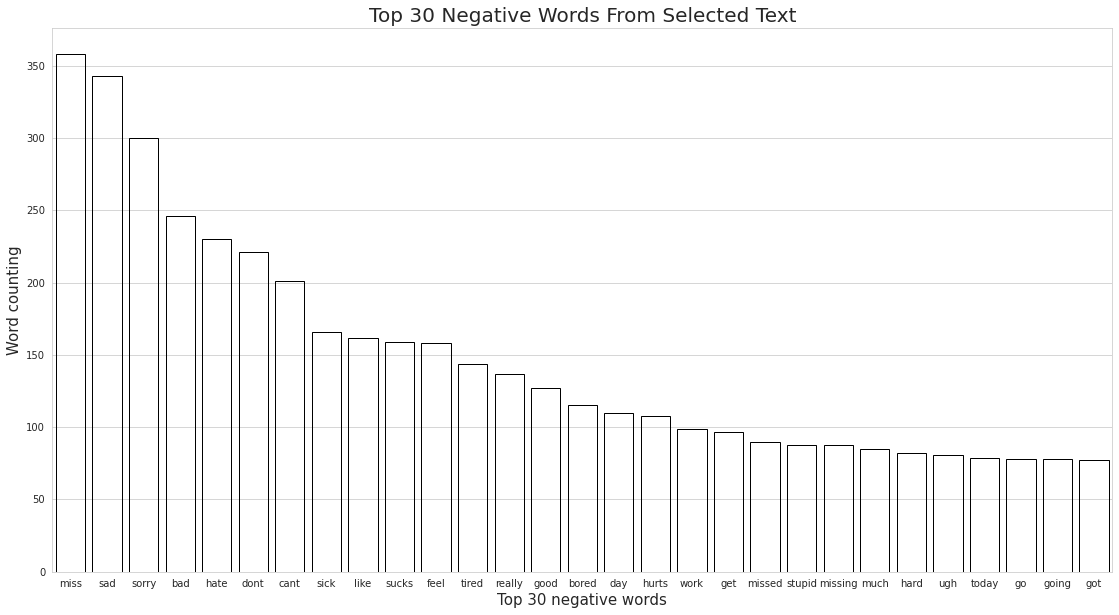

In [0]:
counting_negative_ST = Counter([item for sublist in negative['word from ST'] for item in sublist])
counting_negative_ST = pd.DataFrame(counting_negative_ST.most_common(30))
counting_negative_ST.drop([0],inplace=True)
counting_negative_ST.columns = ['word','counting']

plt.figure(figsize=(19,10))
ax= sns.barplot(data=counting_negative_ST,x='word',y='counting',facecolor=(1, 1, 1, 0),edgecolor='black')
ax.set_title('Top 30 negative words from selected text'.title(),fontsize=20)

ax.set_ylabel('Word counting',fontsize=15)
ax.set_xlabel('Top 30 negative words',fontsize=15);

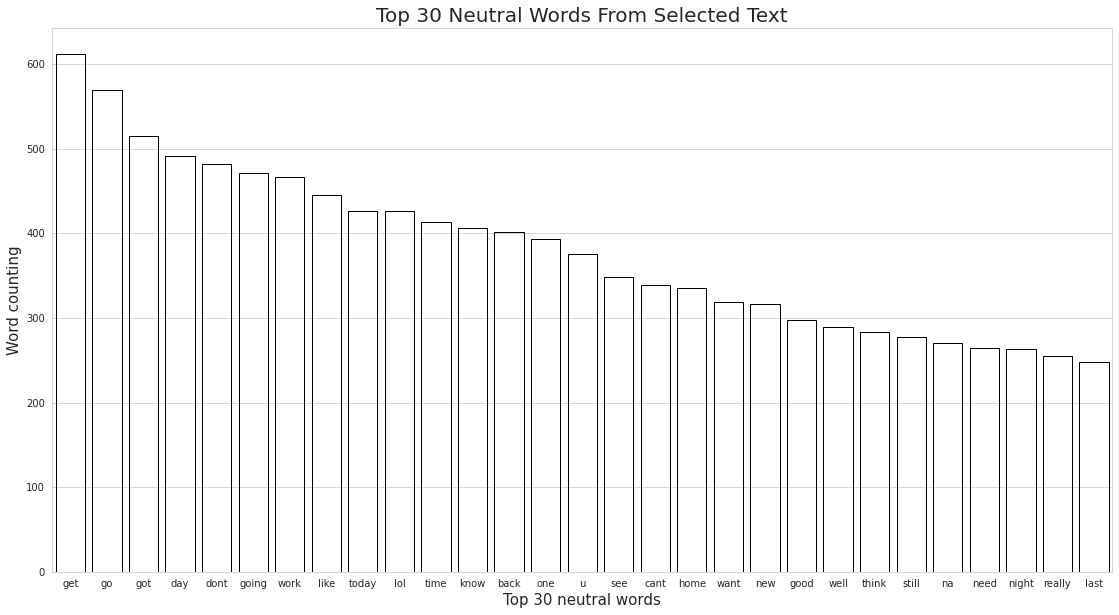

In [0]:
counting_neutral_ST = Counter([item for sublist in neutral['word from ST'] for item in sublist])
counting_neutral_ST = pd.DataFrame(counting_neutral_ST.most_common(30))
counting_neutral_ST.drop([0],inplace=True)
counting_neutral_ST.columns = ['word','counting']

plt.figure(figsize=(19,10))
ax= sns.barplot(data=counting_neutral_ST,x='word',y='counting',facecolor=(1, 1, 1, 0),edgecolor='black')
ax.set_title('Top 30 neutral words from selected text'.title(),fontsize=20)

ax.set_ylabel('Word counting',fontsize=15)
ax.set_xlabel('Top 30 neutral words',fontsize=15);

## 4.2 Word Cloud


In [0]:
positive_text = train[train['sentiment']=='positive']['text']
negative_text = train[train['sentiment']=='negative']['text']
neutral_text = train[train['sentiment']=='neutral']['text']

In [0]:
from wordcloud import WordCloud
from PIL import Image

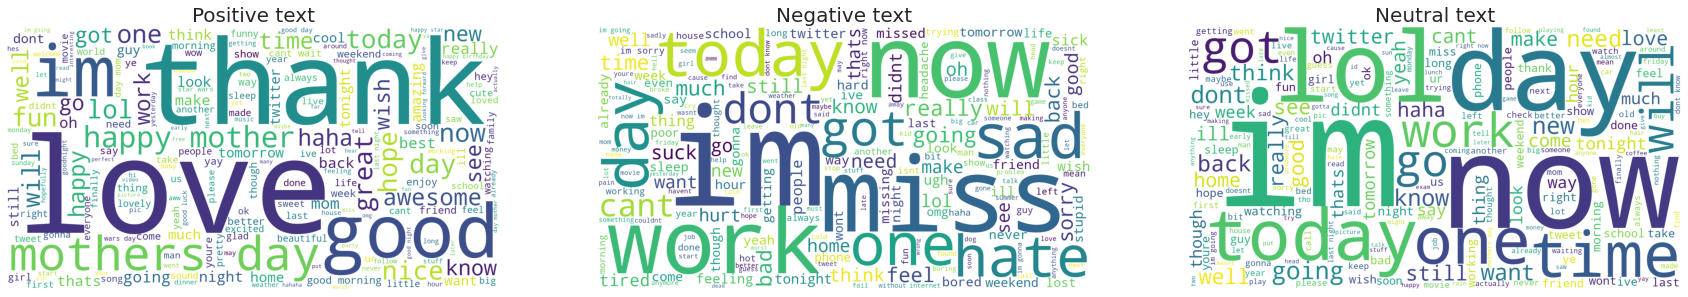

In [0]:
from wordcloud import WordCloud
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[30, 15])
wordcloud1 = WordCloud( background_color='white',
                        width=1500,
                        height=800).generate(" ".join(positive_text))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive text',fontsize=20);

wordcloud2 = WordCloud( background_color='white',
                        width=1500,
                        height=800).generate(" ".join(negative_text))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative text',fontsize=20);

wordcloud3 = WordCloud( background_color='white',
                        width=1500,
                        height=800).generate(" ".join(neutral_text))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Neutral text',fontsize=20);

In [0]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(15.0,8.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    wordcloud = WordCloud(background_color=color,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [0]:
positive_selected_text = train[train['sentiment']=='positive']['selected_text']
negative_selected_text = train[train['sentiment']=='negative']['selected_text']
neutral_selected_text = train[train['sentiment']=='neutral']['selected_text']

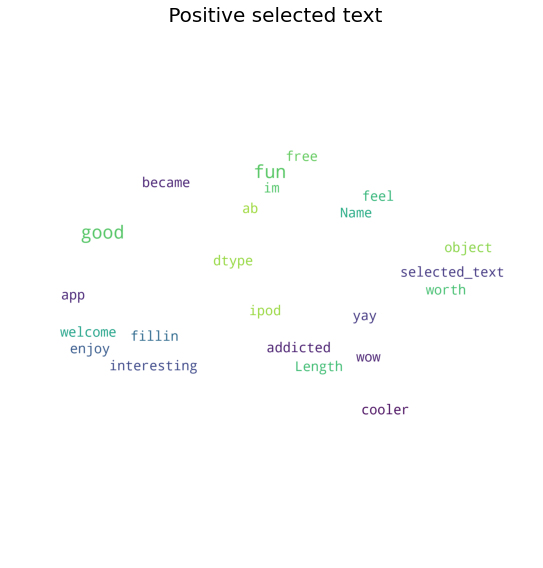

In [0]:
pos_mask = np.array(Image.open('/content/drive/My Drive/Colab Notebooks/Kaggle/Tweet sentiment extraction/comment.png'))
plot_wordcloud(positive_selected_text,mask=pos_mask,color='white',max_font_size=70,title_size=20,title=" Positive selected text")

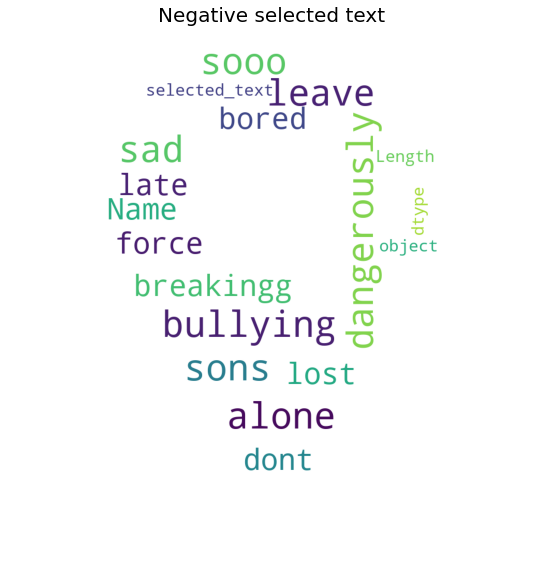

In [0]:
pos_mask = np.array(Image.open('/content/drive/My Drive/Colab Notebooks/Kaggle/Tweet sentiment extraction/loc.png'))
plot_wordcloud(negative_selected_text,mask=pos_mask,color='white',max_font_size=70,title_size=20,title="Negative selected text")

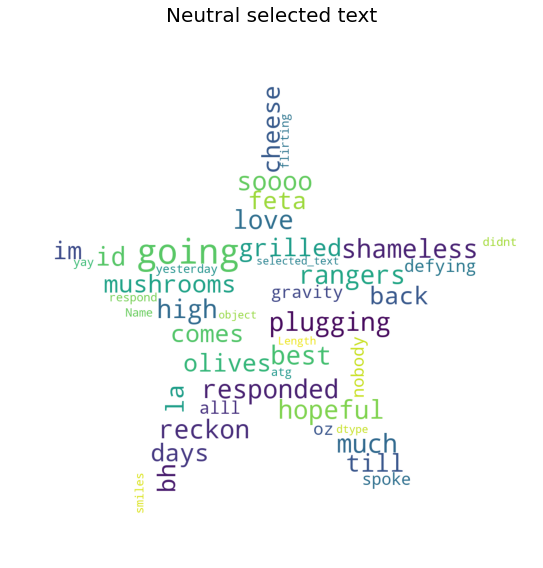

In [0]:
pos_mask = np.array(Image.open('/content/drive/My Drive/Colab Notebooks/Kaggle/Tweet sentiment extraction/star.png'))
plot_wordcloud(neutral_selected_text,mask=pos_mask,color='white',max_font_size=70,title_size=20,title="Neutral selected text")

# 5. N-gram analysis


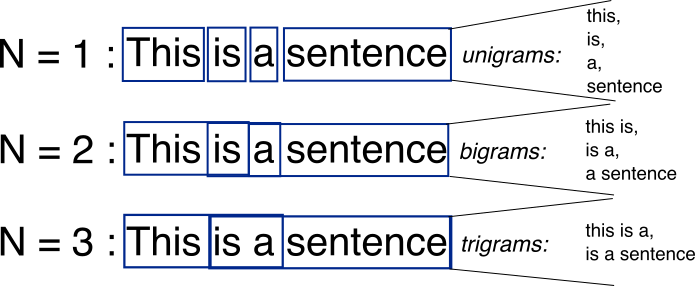

In [0]:
Image('/content/drive/My Drive/Colab Notebooks/Kaggle/Tweet sentiment extraction/n-gram.png')


[Source](https://deepai.org/machine-learning-glossary-and-terms/n-gram)

N-grams are simply all combinations of words or letters of length n that you can find in your source text.

For N-gram analysis we need countvectorizer from sci-kit learn [How to list the most common words from text corpus using countvectorizer ](https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d)

**Notice** 
In the part 4 We used Counter library to get a common word, but  this function is incapable to get a bigram or trigram. In other word that can get only unigram. That why we use another function 

In [0]:
from sklearn.feature_extraction.text import CountVectorizer


# How to list the most common words from text corpus using countvectorizer 
def WordRanking(corpus,n_gram,n=None):
   
    vec = CountVectorizer(ngram_range=n_gram,stop_words = 'english').fit(corpus)
    # Here we get a Bag of Word model 
    
    bag_of_words = vec.transform(corpus)
    # bag_of_words a matrix where each row represents a specific text in corpus and each column represents a word in vocabulary,
    # that is, all words found in corpus. Note that bag_of_words[i,j] is the occurrence of word j in the text i.
    
    sum_words = bag_of_words.sum(axis=0) 
    # we are adding the elements for each column of bag_of_words matrix.
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    #Finally we sort a list of tuples that contain the word and their occurrence in the corpus.
    
    return words_freq[:n]

In [0]:
postive_bigrams = WordRanking(positive_selected_text,(2,2),30)
negative_bigrams = WordRanking(negative_selected_text,(2,2),30)
neutral_bigrams = WordRanking(neutral_selected_text,(2,2),30)

postive_bigrams = pd.DataFrame(postive_bigrams,columns=['word','counting'])
negative_bigrams = pd.DataFrame(negative_bigrams,columns=['word','counting'])
neutral_bigrams = pd.DataFrame(neutral_bigrams,columns=['word','counting'])


## 5.1 Bigrams analysis


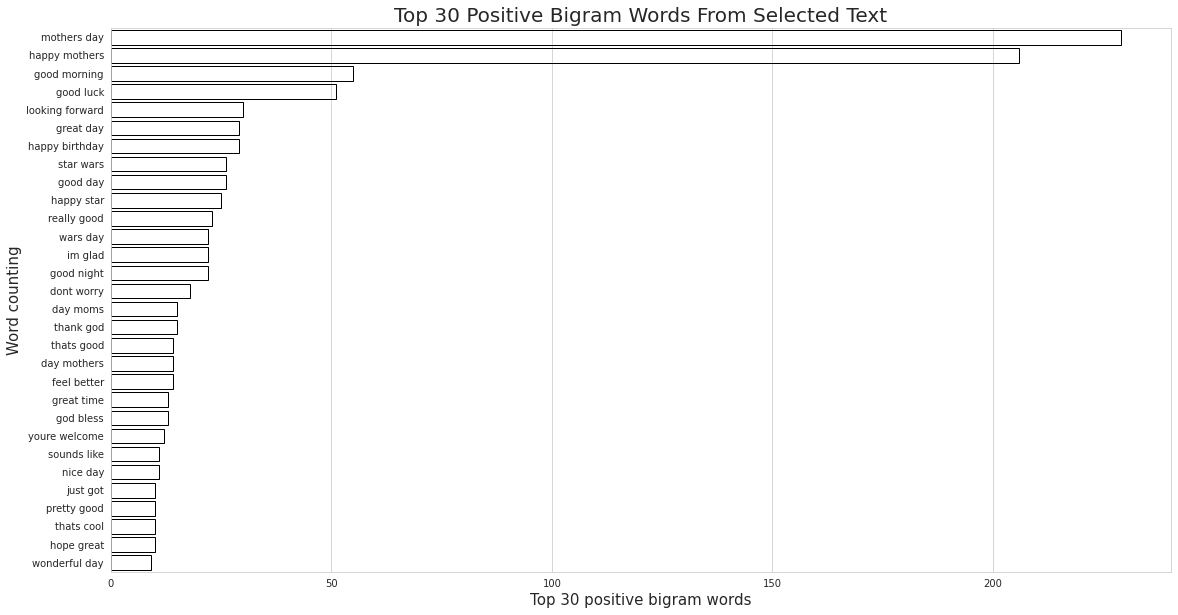

In [0]:
plt.figure(figsize=(19,10))
ax= sns.barplot(data=postive_bigrams,y='word',x='counting',facecolor=(1, 1, 1, 0),edgecolor='black')
ax.set_title('Top 30 positive bigram words from selected text'.title(),fontsize=20)

ax.set_ylabel('Word counting',fontsize=15)
ax.set_xlabel('Top 30 positive bigram words',fontsize=15);

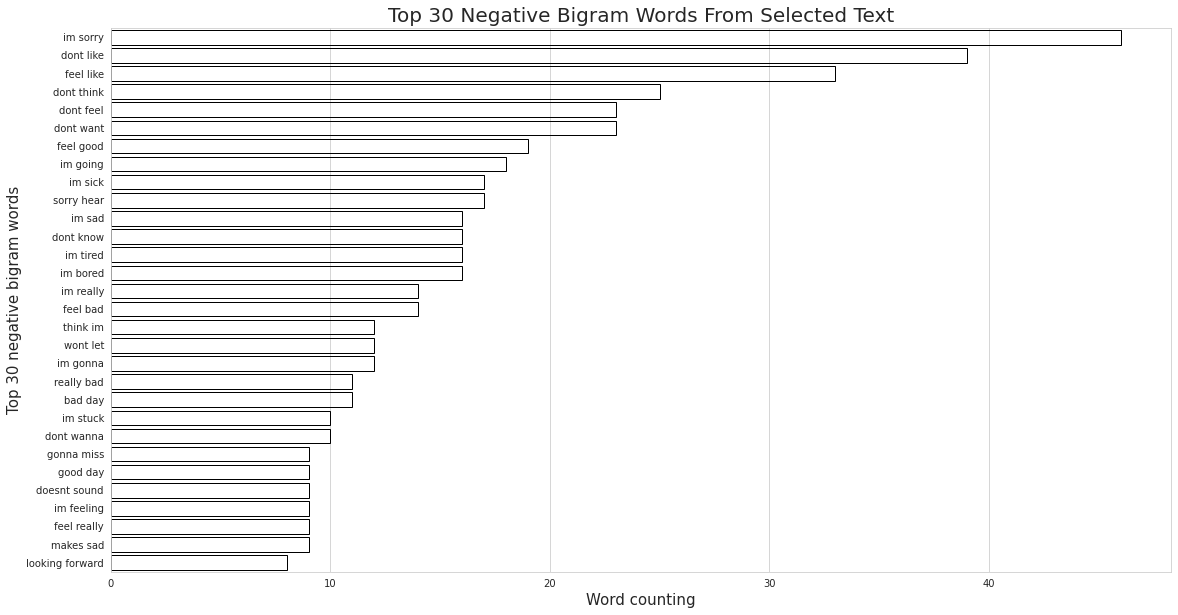

In [0]:
plt.figure(figsize=(19,10))
ax= sns.barplot(data=negative_bigrams,y='word',x='counting',facecolor=(1, 1, 1, 0),edgecolor='black')
ax.set_title('Top 30 negative bigram words from selected text'.title(),fontsize=20)

ax.set_xlabel('Word counting',fontsize=15)
ax.set_ylabel('Top 30 negative bigram words',fontsize=15);

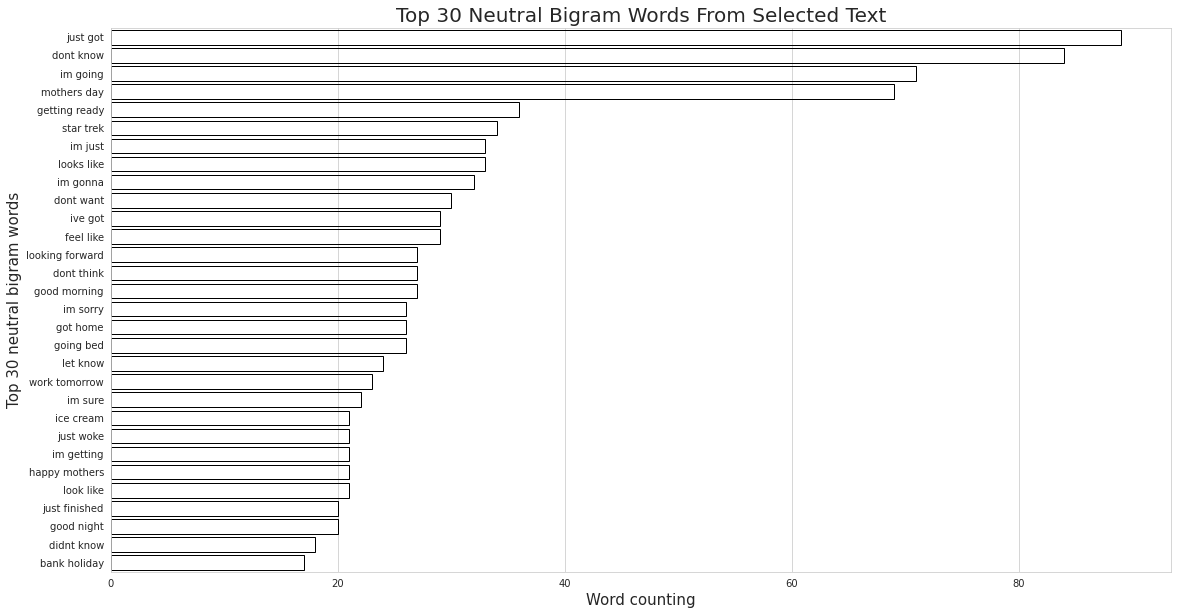

In [0]:
plt.figure(figsize=(19,10))
ax= sns.barplot(data=neutral_bigrams,y='word',x='counting',facecolor=(1, 1, 1, 0),edgecolor='black')
ax.set_title('Top 30 neutral bigram words from selected text'.title(),fontsize=20)

ax.set_xlabel('Word counting',fontsize=15)
ax.set_ylabel('Top 30 neutral bigram words',fontsize=15);

## 5.2 Trigrams analysis


In [0]:
positive_trigrams = WordRanking(positive_selected_text,(3,3),30)
negative_trigrams = WordRanking(negative_selected_text,(3,3),30)
neutral_trigrams = WordRanking(neutral_selected_text,(3,3),30)

positive_trigrams = pd.DataFrame(positive_trigrams,columns=['word','counting'])
negative_trigrams = pd.DataFrame(negative_trigrams,columns=['word','counting'])
neutral_trigrams = pd.DataFrame(neutral_trigrams,columns=['word','counting'])

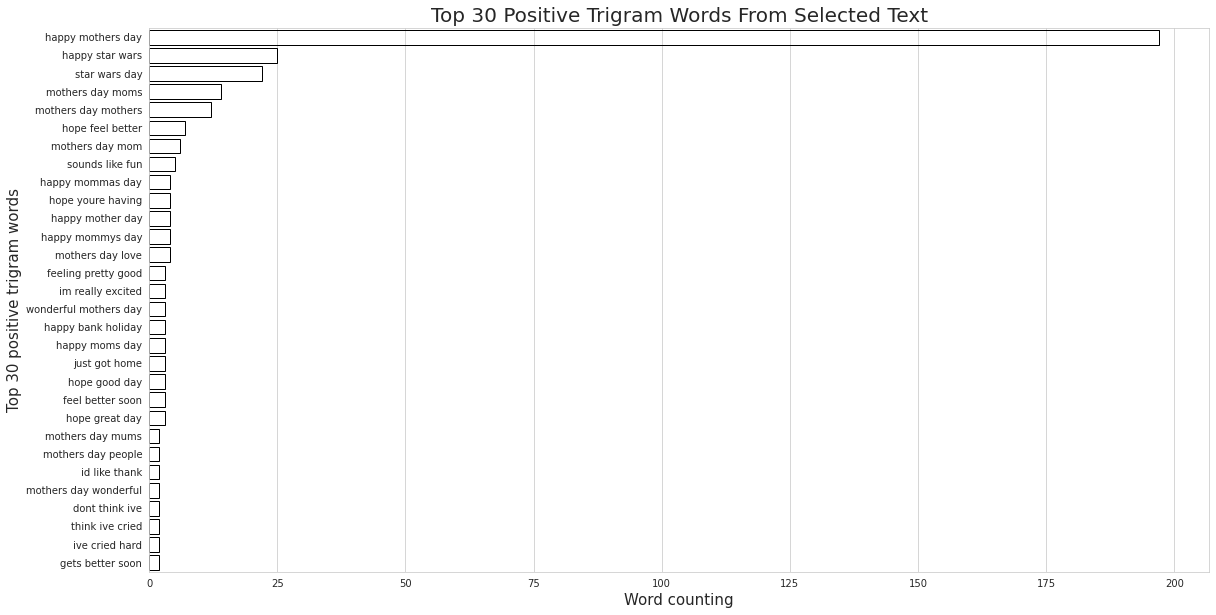

In [0]:
plt.figure(figsize=(19,10))
ax= sns.barplot(data=positive_trigrams,y='word',x='counting',facecolor=(1, 1, 1, 0),edgecolor='black')
ax.set_title('Top 30 positive trigram words from selected text'.title(),fontsize=20)

ax.set_xlabel('Word counting',fontsize=15)
ax.set_ylabel('Top 30 positive trigram words',fontsize=15);

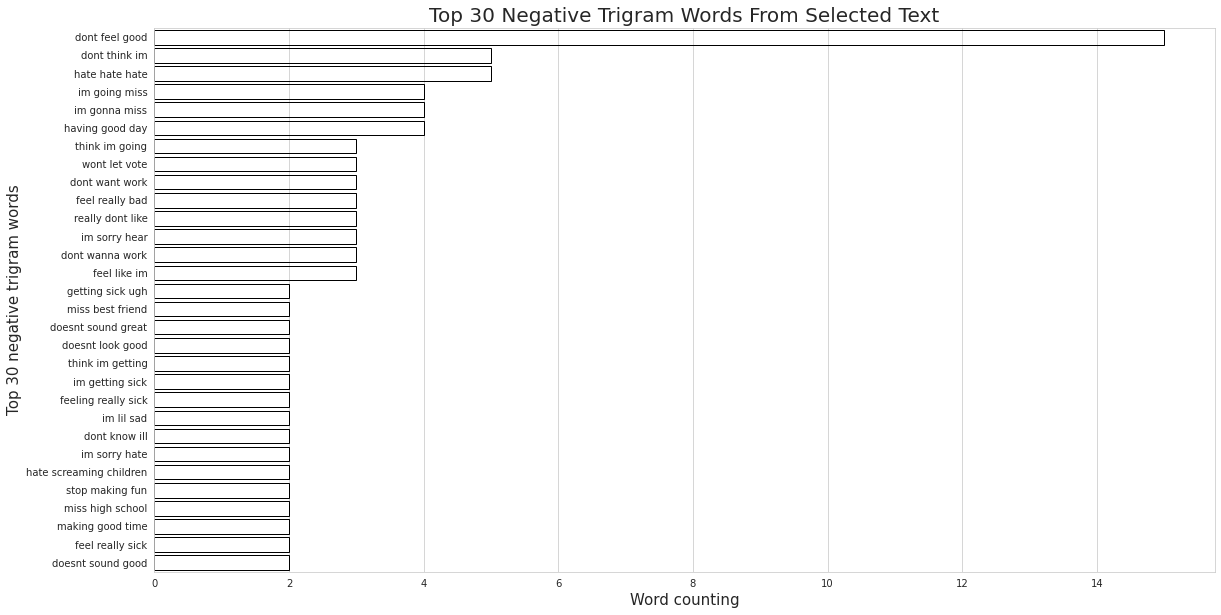

In [0]:
plt.figure(figsize=(19,10))
ax= sns.barplot(data=negative_trigrams,y='word',x='counting',facecolor=(1, 1, 1, 0),edgecolor='black')
ax.set_title('Top 30 negative trigram words from selected text'.title(),fontsize=20)

ax.set_xlabel('Word counting',fontsize=15)
ax.set_ylabel('Top 30 negative trigram words',fontsize=15);

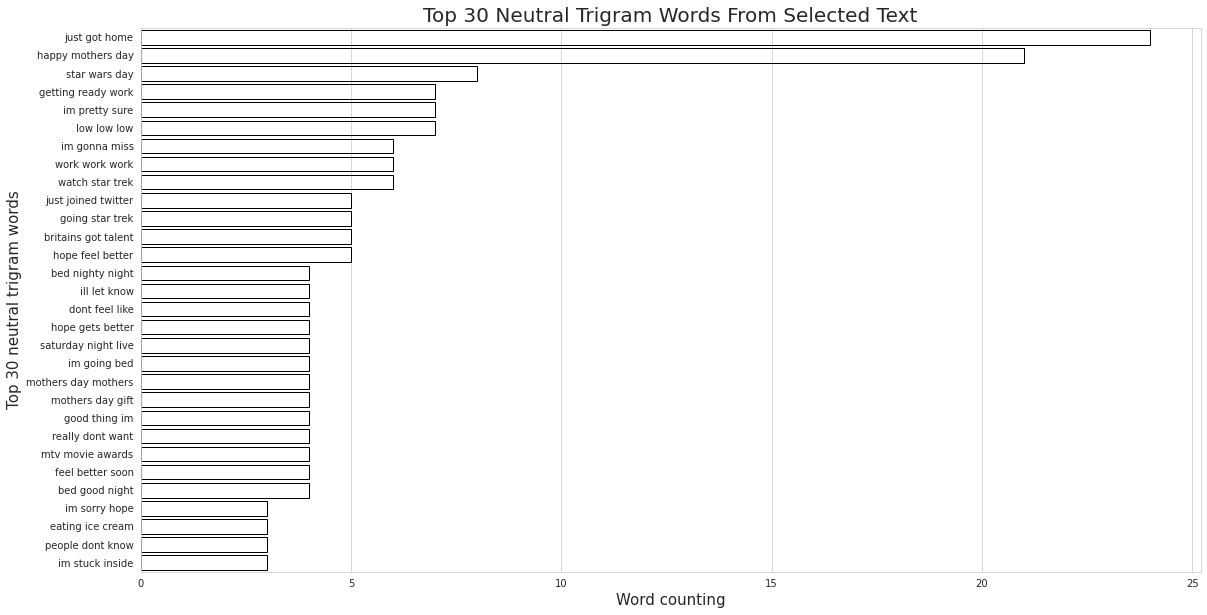

In [0]:
plt.figure(figsize=(19,10))
ax= sns.barplot(data=neutral_trigrams,y='word',x='counting',facecolor=(1, 1, 1, 0),edgecolor='black')
ax.set_title('Top 30 neutral trigram words from selected text'.title(),fontsize=20)

ax.set_xlabel('Word counting',fontsize=15)
ax.set_ylabel('Top 30 neutral trigram words',fontsize=15);

# 6 Options 

## 6.1 Spelling corrector

There is another concept of spellig corrector.[How to Write a Spelling Corrector from Peter Norvig](http://norvig.com/spell-correct.html).

If you want to use this corrector, make sure that you have 'big.txt' file on your kernel. The reason why I didn't use this corrector is that my laptop can't reach the ability to compile the code.

In [0]:
'''
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('big.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))
    
    
'''

## 6.2 Removig weird spaces


In [0]:
'''
def remove_space(text): 
    text = text.strip() 
    text = text.split()
    return " ".join(text)
'''

# 7. Closing 
Thanks for your reading my kernal.Because I'm beginner level of data scientist  so i needed much time to practice in order to improve my kernal.


thank you all very much :) 

